# Assignment 1

### Task 1.1

In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

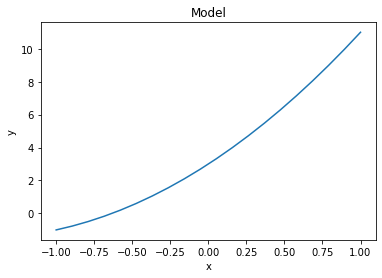

In [17]:
def arbitrary_poly(params):
    poly_model = lambda x: sum([p*(x**i) for i, p in enumerate(params)])
    return poly_model

# params: [theta_0, theta_1, theta_2]
true_params = [3,6,2]
y_model = arbitrary_poly(true_params)

# Plot true model
x = np.linspace(start=-1, stop=1, num=20)
plt.figure()
plt.plot(x, y_model(x))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model");

### Task 1.2

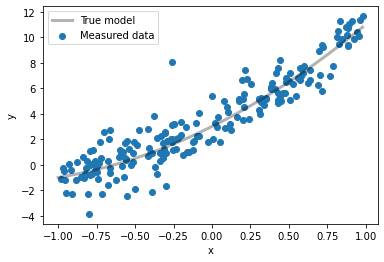

In [19]:
from scipy.stats import norm, laplace

# Hyperparameters for the type of noise-generating distribution.
loc = 0           # location (mean) parameter 
scale = 1         # scaling (std dev) parameter
magnitude = 1.2   # noise magnitude
N = 200           # number of samples

# Generate data points
range_low, range_high = -1, 1
u = np.sort(np.random.uniform(range_low,range_high,N))
y_true = y_model(u)

# Generate noise
noiseProbability = 0.5
laplaceBeta = 1
normVariance = 1

noiseLaplace = magnitude * np.random.laplace(loc, laplaceBeta, N)
noiseGaussian = magnitude * np.random.normal(loc, normVariance, N)

noiseLaplace = np.random.choice(noiseLaplace, int(N*noiseProbability))
noiseGaussian = np.random.choice(noiseGaussian, int(N*(1-noiseProbability)))

noise = np.concatenate((noiseLaplace, noiseGaussian))

# Add noise to the generated data points - thus simulating measurement
y = y_true + noise

# Plot measured data
plt.scatter(u, y, label=r"Measured data")
u0 = np.linspace(-1, max(u), N)
plt.plot(u0, y_model(u0), "k", alpha=0.3, lw=3, label="True model")
plt.legend()
plt.xlabel("x")
plt.ylabel("y");

### Task 1.3 - LS estimate

LS parameters:         ['3.19', '5.91', '1.85']
True model parameters: [3, 6, 2]


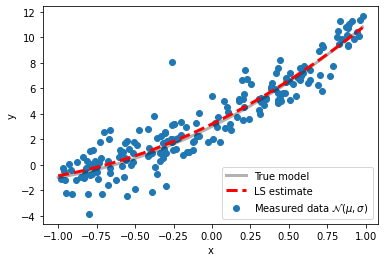

In [29]:
# Step 1 - rewrite the model in matric form to get the data tensor u
# Matrix form
u_tensor_0 = np.reshape(u,(N,1))

ones_vec = np.ones((N,1))
u_tensor = np.append(ones_vec, u_tensor_0, axis=1)

for i in range(2,len(true_params)):
    u_tensor = np.append(u_tensor, np.power(u_tensor_0, i) ,axis=1)
    
# Step 2 - calculate inverse u^T*u
u_transpose_dot_u = np.dot(u_tensor.T,u_tensor)  # calculating dot product
u_transpose_dot_u_inv = np.linalg.inv(u_transpose_dot_u) #calculating inverse

# Step 3 - calculate u^T*u
u_transpose_dot_y = np.dot(u_tensor.T,y)  # calculating dot product

# Step 4
LS_params = np.dot(u_transpose_dot_u_inv,u_transpose_dot_y)
LS_params_rounded = ["{:.2f}".format(round(i, 2)) for i in LS_params.tolist()]
print(f"LS parameters:         {LS_params_rounded}")
print(f"True model parameters: {true_params}")

# Recreate model based on LS estimate:
LS_params = LS_params.tolist()
LS_estimate = arbitrary_poly(LS_params)

# Plot true vs. estimated model
plt.scatter(u, y, label=r"Measured data $\mathcal{N}(\mu, \sigma)$")
u0 = np.linspace(-1, max(u), N)
plt.plot(u0, y_model(u0), "k", alpha=0.3, lw=3, label="True model")
plt.plot(u0, LS_estimate(u0), "r--",  lw=3, label="LS estimate")
#plt.xlim(0, 10)
plt.legend()
plt.xlabel("x")
plt.ylabel("y");

Calculate the Euclidean distance d between the LS model and the true model

In [34]:
dist = np.linalg.norm(y_model(u0) - LS_estimate(u0))
print("The Euclidean distance between the true model and the LS model is: {0:.4f}".format(dist))

The Euclidean distance between the true model and the LS model is: 2.2292


## Task 1.4

We define a function that takes aplha, sigma and beta as params and returns the Euclidean distance.

In [50]:
def model_error(alpha, sigma, beta):
    # params: [theta_0, theta_1, theta_2]
    true_params = [3,6,2]
    y_model = arbitrary_poly(true_params)
    
    # Hyperparameters for the type of noise-generating distribution.
    loc = 0           # location (mean) parameter 
    scale = 1         # scaling (std dev) parameter
    magnitude = 1.2   # noise magnitude
    N = 200           # number of samples

    # Generate data points
    range_low, range_high = -1, 1
    u = np.sort(np.random.uniform(range_low,range_high,N))
    y_true = y_model(u)

    # Generate noise
    laplaceBeta = 1
    normVariance = 1

    noiseLaplace = magnitude * np.random.laplace(loc, beta, N)
    noiseGaussian = magnitude * np.random.normal(loc, sigma, N)

    noiseLaplace = np.random.choice(noiseLaplace, int(np.ceil(N*(1-alpha))))
    noiseGaussian = np.random.choice(noiseGaussian, int(np.ceil(N*(alpha))))

    noise = np.concatenate((noiseLaplace, noiseGaussian))
    
    np.random.shuffle(noise)

    # Add noise to the generated data points - thus simulating measurement
    y = y_true + noise[:200]
    
    #Calculate LS:
    # Step 1 - rewrite the model in matric form to get the data tensor u
    # Matrix form
    u_tensor_0 = np.reshape(u,(N,1))

    ones_vec = np.ones((N,1))
    u_tensor = np.append(ones_vec, u_tensor_0, axis=1)

    for i in range(2,len(true_params)):
        u_tensor = np.append(u_tensor, np.power(u_tensor_0, i) ,axis=1)

    # Step 2 - calculate inverse u^T*u
    u_transpose_dot_u = np.dot(u_tensor.T,u_tensor)  # calculating dot product
    u_transpose_dot_u_inv = np.linalg.inv(u_transpose_dot_u) #calculating inverse

    # Step 3 - calculate u^T*u
    u_transpose_dot_y = np.dot(u_tensor.T,y)  # calculating dot product

    # Step 4
    LS_params = np.dot(u_transpose_dot_u_inv,u_transpose_dot_y)
    LS_params_rounded = ["{:.2f}".format(round(i, 2)) for i in LS_params.tolist()]

    # Recreate model based on LS estimate:
    LS_params = LS_params.tolist()
    LS_estimate = arbitrary_poly(LS_params)
    
    # Euclidean distance
    dist = np.linalg.norm(y_model(u0) - LS_estimate(u0))
    return dist

Plots to task 1.4

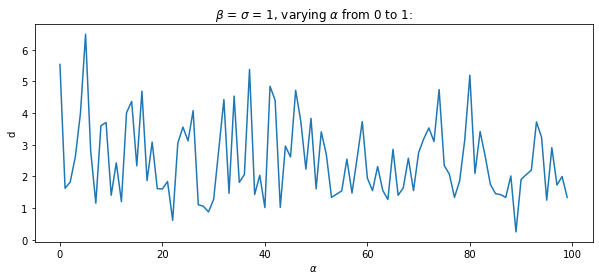

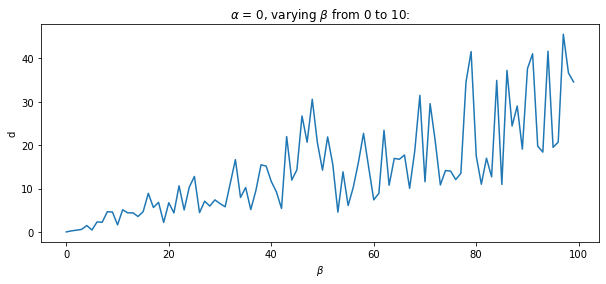

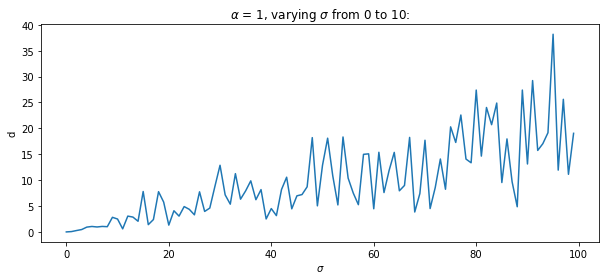

In [51]:
alpha_error = [model_error(alpha = a/100, beta = 1, sigma = 1) for a in range(100)]
beta_error = [model_error(alpha = 0, beta = b/10, sigma = 0) for b in range(100)]
sigma_error = [model_error(alpha = 1, beta = 0, sigma = s/10) for s in range(100)]

plt.figure(figsize=(10, 4))
plt.plot(alpha_error)
plt.title(r"$\beta$ = $\sigma$ = 1, varying $\alpha$ from 0 to 1:")
plt.xlabel(r'$\alpha$')
plt.ylabel("dist")
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(beta_error)
plt.title(r"$\alpha$ = 0, varying $\beta$ from 0 to 10:")
plt.xlabel(r"$\beta$")
plt.ylabel("dist")
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(sigma_error)
plt.title(r"$\alpha$ = 1, varying $\sigma$ from 0 to 10:")
plt.xlabel(r"$\sigma$")
plt.ylabel("dist")
plt.show()


To enhance the readability of the results, we increase the sampling rate and plot the rollig average over aplha/dist.

<AxesSubplot:xlabel='$\\alpha$'>

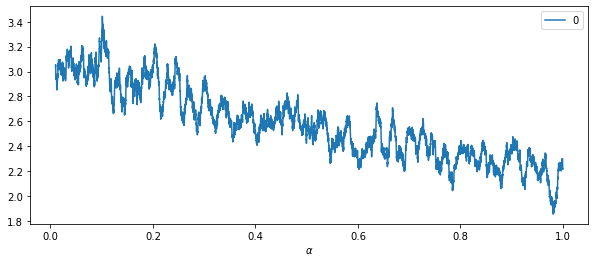

In [56]:
ar = np.array([model_error(alpha=a/10000, beta=1, sigma=1) for a in range(10000)])
ar_df = pd.DataFrame(ar)
ar_df = pd.DataFrame(ar)
ar_df[r"$\alpha$"] = np.linspace(0, 1, 10000)
ar_df.set_index(r"$\alpha$", r"dist", inplace=True)
ar_df.rolling(100).mean().plot(figsize=(10, 4))

### Comments on the plots:
On the two last plots one can observe that the Euclidean distance increases close to linearly as $\sigma$ increases. However, so does the variance. This is caused by the increasing standard deviation in the normal and gaussian distribution respectivly when we increase $\sigma$ and $\beta$.

On the first plot $\alpha$ varies from 0 to 1. The result is the Euclidean distance decreases when $\alpha$ approaches 1. This might be caused by when approaching the standars distribution, the value tends to be gathered around the mean.